In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, io, exposure, img_as_ubyte
from skimage.color import rgb2gray

In [2]:
try:
    image = data.camera()
    print("Loaded 'camera' benchmark image (grayscale).")
except Exception as e:
    print(f"Error loading 'camera' image: {e}")
    print("Attempting to create a sample gradient image instead.")
    image = np.arange(256*256, dtype=np.uint8).reshape((256, 256))
    image[:, :128] = image[:, :128] // 2

Loaded 'camera' benchmark image (grayscale).


In [ ]:
kernel_s = (image.shape[0] // 8, image.shape[1] // 8)
clip_l = 0.03

print(f"Applying CLAHE with kernel_size={kernel_s} and clip_limit={clip_l}")

clahe_img_float = exposure.equalize_adapthist(
    image,
    kernel_size=kernel_s,
    clip_limit=clip_l
)

clahe_img_uint8 = img_as_ubyte(clahe_img_float)

Applying CLAHE with kernel_size=(64, 64) and clip_limit=0.03


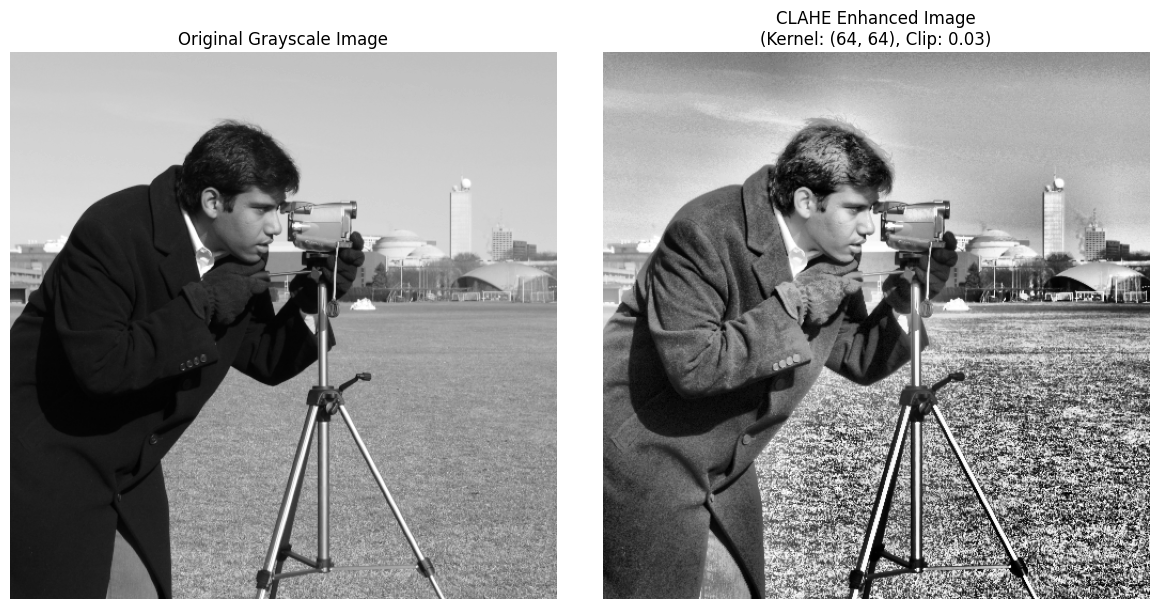

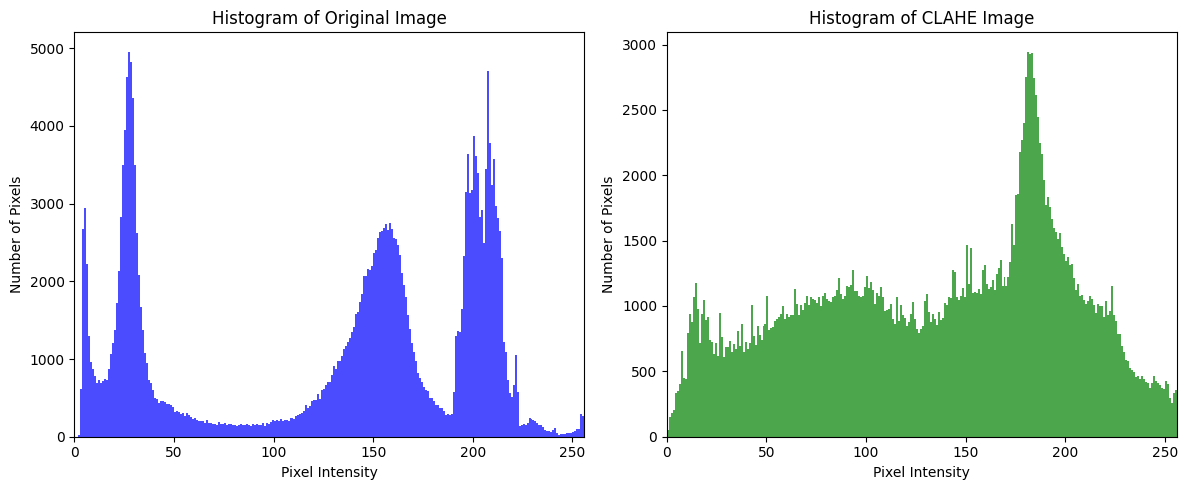

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax = axes.ravel() 

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Grayscale Image")
ax[0].axis('off') 

ax[1].imshow(clahe_img_uint8, cmap='gray')
ax[1].set_title(f"CLAHE Enhanced Image\n(Kernel: {kernel_s}, Clip: {clip_l})")
ax[1].axis('off') 

plt.tight_layout() 
plt.show()

fig_hist, axes_hist = plt.subplots(1, 2, figsize=(12, 5))
ax_hist = axes_hist.ravel()

ax_hist[0].hist(image.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
ax_hist[0].set_title("Histogram of Original Image")
ax_hist[0].set_xlabel("Pixel Intensity")
ax_hist[0].set_ylabel("Number of Pixels")
ax_hist[0].set_xlim(0, 256)

ax_hist[1].hist(clahe_img_uint8.ravel(), bins=256, range=(0, 256), color='green', alpha=0.7)
ax_hist[1].set_title("Histogram of CLAHE Image")
ax_hist[1].set_xlabel("Pixel Intensity")
ax_hist[1].set_ylabel("Number of Pixels")
ax_hist[1].set_xlim(0, 256)

plt.tight_layout()
plt.show()